In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


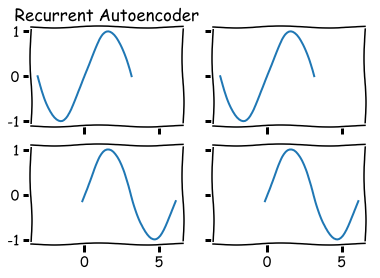

In [7]:
plt.xkcd()

x1 = np.linspace(-np.pi, np.pi)
y1 = np.sin(x1)
phi = 3
x2 = np.linspace(-np.pi+phi, np.pi+phi)
y2 = np.sin(x2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax1.plot(x1, y1)
ax1.set_title('Recurrent Autoencoder')
ax2.plot(x1, y1)
ax3.plot(x2, y2)
ax4.plot(x2, y2)
plt.show()

In [22]:
import random
def gen(batch_size):
    seq_length = 10

    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        rand = random.random() * 2 * np.pi

        sig1 = np.sin(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        sig2 = np.cos(np.linspace(0.0 * np.pi + rand,
                                  3.0 * np.pi + rand, seq_length * 2))
        x1 = sig1[:seq_length]
        y1 = sig1[seq_length:]
        x2 = sig2[:seq_length]
        y2 = sig2[seq_length:]

        x_ = np.array([x1, x2])
        y_ = np.array([y1, y2])
        x_, y_ = x_.T, y_.T

        batch_x.append(x_)
        batch_y.append(y_)

    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)

    return batch_x, batch_y

In [31]:
batch_x, batch_y = gen(12)

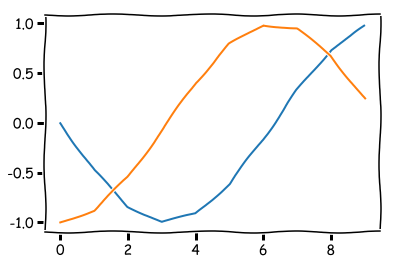

In [32]:
plt.plot(batch_x[0])

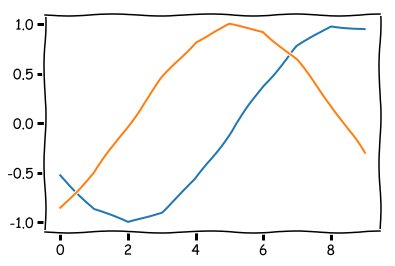

In [33]:
plt.plot(batch_x[1])

In [35]:
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector

batch_size = 100
X_train, _ = gen(batch_size)

m = Sequential()
m.add(LSTM(2, input_shape=(10, 2)))
m.add(RepeatVector(10))
m.add(LSTM(2, return_sequences=True))
print(m.summary())
m.compile(loss='mse', optimizer='adam')
history = m.fit(X_train, X_train, epochs=2000, batch_size=100)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2)                 40        
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 10, 2)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 2)             40        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/2000
100/100 [==============================] - 2s 16ms/step - loss: 0.5353
Epoch 2/2000
100/100 [==============================] - 0s 162us/step - loss: 0.5349
Epoch 3/2000
100/100 [==============================] - 0s 153us/step - loss: 0.5344
Epoch 4/2000
100/100 [==============================] - 0s 199us/step - loss: 0.5339
Epoch 5/2000
100/100 [==============================] - 0s 193us/step - loss: 0.5335
Epoch 6/2000
100/100 [==============================] - 0s 210us/step - loss: 0.5330
Epoch 7/2000
100/100 [==============================] - 0s 186us/step - loss: 0.5326
Epoch 8/2000
100/100 [==============================] - 0s 184us/step - loss: 0.5321
Epoch 9/2000
100/100 [==============================] - 0s 224us/step - loss: 0.5317
Epoch 10/2000
100/100 [==============================] - 0s 190us/step - loss: 0.5313
Epoch 11/2000
100/100 [==============================] - 0s 232us/step - loss: 0.5308
Epoch 12/2000
100/100 [==============================] - 0s 273u

Epoch 97/2000
100/100 [==============================] - 0s 163us/step - loss: 0.5079
Epoch 98/2000
100/100 [==============================] - 0s 177us/step - loss: 0.5077
Epoch 99/2000
100/100 [==============================] - 0s 218us/step - loss: 0.5075
Epoch 100/2000
100/100 [==============================] - 0s 197us/step - loss: 0.5073
Epoch 101/2000
100/100 [==============================] - 0s 219us/step - loss: 0.5072
Epoch 102/2000
100/100 [==============================] - 0s 198us/step - loss: 0.5070
Epoch 103/2000
100/100 [==============================] - 0s 207us/step - loss: 0.5068
Epoch 104/2000
100/100 [==============================] - 0s 193us/step - loss: 0.5066
Epoch 105/2000
100/100 [==============================] - 0s 253us/step - loss: 0.5064
Epoch 106/2000
100/100 [==============================] - 0s 250us/step - loss: 0.5062
Epoch 107/2000
100/100 [==============================] - 0s 182us/step - loss: 0.5061
Epoch 108/2000
100/100 [======================

Epoch 192/2000
100/100 [==============================] - 0s 166us/step - loss: 0.4908
Epoch 193/2000
100/100 [==============================] - 0s 185us/step - loss: 0.4907
Epoch 194/2000
100/100 [==============================] - 0s 157us/step - loss: 0.4905
Epoch 195/2000
100/100 [==============================] - 0s 188us/step - loss: 0.4903
Epoch 196/2000
100/100 [==============================] - 0s 205us/step - loss: 0.4901
Epoch 197/2000
100/100 [==============================] - 0s 202us/step - loss: 0.4899
Epoch 198/2000
100/100 [==============================] - 0s 184us/step - loss: 0.4897
Epoch 199/2000
100/100 [==============================] - 0s 188us/step - loss: 0.4895
Epoch 200/2000
100/100 [==============================] - 0s 209us/step - loss: 0.4893
Epoch 201/2000
100/100 [==============================] - 0s 189us/step - loss: 0.4891
Epoch 202/2000
100/100 [==============================] - 0s 203us/step - loss: 0.4889
Epoch 203/2000
100/100 [===================

100/100 [==============================] - 0s 157us/step - loss: 0.4715
Epoch 287/2000
100/100 [==============================] - 0s 148us/step - loss: 0.4713
Epoch 288/2000
100/100 [==============================] - 0s 147us/step - loss: 0.4711
Epoch 289/2000
100/100 [==============================] - 0s 135us/step - loss: 0.4709
Epoch 290/2000
100/100 [==============================] - 0s 141us/step - loss: 0.4707
Epoch 291/2000
100/100 [==============================] - 0s 139us/step - loss: 0.4705
Epoch 292/2000
100/100 [==============================] - 0s 140us/step - loss: 0.4703
Epoch 293/2000
100/100 [==============================] - 0s 143us/step - loss: 0.4701
Epoch 294/2000
100/100 [==============================] - 0s 144us/step - loss: 0.4699
Epoch 295/2000
100/100 [==============================] - 0s 155us/step - loss: 0.4697
Epoch 296/2000
100/100 [==============================] - 0s 146us/step - loss: 0.4695
Epoch 297/2000
100/100 [==============================] - 

Epoch 381/2000
100/100 [==============================] - 0s 171us/step - loss: 0.4545
Epoch 382/2000
100/100 [==============================] - 0s 168us/step - loss: 0.4543
Epoch 383/2000
100/100 [==============================] - 0s 142us/step - loss: 0.4542
Epoch 384/2000
100/100 [==============================] - 0s 179us/step - loss: 0.4540
Epoch 385/2000
100/100 [==============================] - 0s 183us/step - loss: 0.4538
Epoch 386/2000
100/100 [==============================] - 0s 176us/step - loss: 0.4537
Epoch 387/2000
100/100 [==============================] - 0s 184us/step - loss: 0.4535
Epoch 388/2000
100/100 [==============================] - 0s 186us/step - loss: 0.4533
Epoch 389/2000
100/100 [==============================] - 0s 175us/step - loss: 0.4532
Epoch 390/2000
100/100 [==============================] - 0s 192us/step - loss: 0.4530
Epoch 391/2000
100/100 [==============================] - 0s 181us/step - loss: 0.4528
Epoch 392/2000
100/100 [===================

100/100 [==============================] - 0s 178us/step - loss: 0.4337
Epoch 476/2000
100/100 [==============================] - 0s 177us/step - loss: 0.4333
Epoch 477/2000
100/100 [==============================] - 0s 171us/step - loss: 0.4330
Epoch 478/2000
100/100 [==============================] - 0s 180us/step - loss: 0.4326
Epoch 479/2000
100/100 [==============================] - 0s 192us/step - loss: 0.4322
Epoch 480/2000
100/100 [==============================] - 0s 209us/step - loss: 0.4319
Epoch 481/2000
100/100 [==============================] - 0s 162us/step - loss: 0.4315
Epoch 482/2000
100/100 [==============================] - 0s 202us/step - loss: 0.4311
Epoch 483/2000
100/100 [==============================] - 0s 188us/step - loss: 0.4307
Epoch 484/2000
100/100 [==============================] - 0s 188us/step - loss: 0.4303
Epoch 485/2000
100/100 [==============================] - 0s 192us/step - loss: 0.4299
Epoch 486/2000
100/100 [==============================] - 

Epoch 570/2000
100/100 [==============================] - 0s 180us/step - loss: 0.3723
Epoch 571/2000
100/100 [==============================] - 0s 151us/step - loss: 0.3715
Epoch 572/2000
100/100 [==============================] - 0s 180us/step - loss: 0.3708
Epoch 573/2000
100/100 [==============================] - 0s 191us/step - loss: 0.3701
Epoch 574/2000
100/100 [==============================] - 0s 196us/step - loss: 0.3694
Epoch 575/2000
100/100 [==============================] - 0s 184us/step - loss: 0.3687
Epoch 576/2000
100/100 [==============================] - 0s 195us/step - loss: 0.3680
Epoch 577/2000
100/100 [==============================] - 0s 167us/step - loss: 0.3673
Epoch 578/2000
100/100 [==============================] - 0s 176us/step - loss: 0.3665
Epoch 579/2000
100/100 [==============================] - 0s 190us/step - loss: 0.3658
Epoch 580/2000
100/100 [==============================] - 0s 173us/step - loss: 0.3652
Epoch 581/2000
100/100 [===================

Epoch 665/2000
100/100 [==============================] - 0s 189us/step - loss: 0.3059
Epoch 666/2000
100/100 [==============================] - 0s 159us/step - loss: 0.3051
Epoch 667/2000
100/100 [==============================] - 0s 154us/step - loss: 0.3044
Epoch 668/2000
100/100 [==============================] - 0s 374us/step - loss: 0.3036
Epoch 669/2000
100/100 [==============================] - 0s 218us/step - loss: 0.3029
Epoch 670/2000
100/100 [==============================] - 0s 314us/step - loss: 0.3021
Epoch 671/2000
100/100 [==============================] - 0s 191us/step - loss: 0.3014
Epoch 672/2000
100/100 [==============================] - 0s 192us/step - loss: 0.3007
Epoch 673/2000
100/100 [==============================] - 0s 225us/step - loss: 0.2999
Epoch 674/2000
100/100 [==============================] - 0s 190us/step - loss: 0.2992
Epoch 675/2000
100/100 [==============================] - 0s 202us/step - loss: 0.2984
Epoch 676/2000
100/100 [===================

100/100 [==============================] - 0s 150us/step - loss: 0.2379
Epoch 760/2000
100/100 [==============================] - 0s 192us/step - loss: 0.2371
Epoch 761/2000
100/100 [==============================] - 0s 173us/step - loss: 0.2363
Epoch 762/2000
100/100 [==============================] - 0s 170us/step - loss: 0.2354
Epoch 763/2000
100/100 [==============================] - 0s 231us/step - loss: 0.2346
Epoch 764/2000
100/100 [==============================] - 0s 183us/step - loss: 0.2338
Epoch 765/2000
100/100 [==============================] - 0s 214us/step - loss: 0.2330
Epoch 766/2000
100/100 [==============================] - 0s 197us/step - loss: 0.2321
Epoch 767/2000
100/100 [==============================] - 0s 264us/step - loss: 0.2313
Epoch 768/2000
100/100 [==============================] - 0s 180us/step - loss: 0.2304
Epoch 769/2000
100/100 [==============================] - 0s 207us/step - loss: 0.2296
Epoch 770/2000
100/100 [==============================] - 

Epoch 854/2000
100/100 [==============================] - 0s 166us/step - loss: 0.1570
Epoch 855/2000
100/100 [==============================] - 0s 235us/step - loss: 0.1563
Epoch 856/2000
100/100 [==============================] - 0s 150us/step - loss: 0.1556
Epoch 857/2000
100/100 [==============================] - 0s 172us/step - loss: 0.1549
Epoch 858/2000
100/100 [==============================] - 0s 223us/step - loss: 0.1542
Epoch 859/2000
100/100 [==============================] - 0s 201us/step - loss: 0.1535
Epoch 860/2000
100/100 [==============================] - 0s 201us/step - loss: 0.1528
Epoch 861/2000
100/100 [==============================] - 0s 185us/step - loss: 0.1520
Epoch 862/2000
100/100 [==============================] - 0s 224us/step - loss: 0.1513
Epoch 863/2000
100/100 [==============================] - 0s 226us/step - loss: 0.1506
Epoch 864/2000
100/100 [==============================] - 0s 219us/step - loss: 0.1499
Epoch 865/2000
100/100 [===================

100/100 [==============================] - 0s 210us/step - loss: 0.0794
Epoch 949/2000
100/100 [==============================] - 0s 179us/step - loss: 0.0790
Epoch 950/2000
100/100 [==============================] - 0s 174us/step - loss: 0.0786
Epoch 951/2000
100/100 [==============================] - 0s 201us/step - loss: 0.0783
Epoch 952/2000
100/100 [==============================] - 0s 188us/step - loss: 0.0779
Epoch 953/2000
100/100 [==============================] - 0s 175us/step - loss: 0.0776
Epoch 954/2000
100/100 [==============================] - 0s 215us/step - loss: 0.0773
Epoch 955/2000
100/100 [==============================] - 0s 247us/step - loss: 0.0769
Epoch 956/2000
100/100 [==============================] - 0s 226us/step - loss: 0.0766
Epoch 957/2000
100/100 [==============================] - 0s 221us/step - loss: 0.0763
Epoch 958/2000
100/100 [==============================] - 0s 201us/step - loss: 0.0759
Epoch 959/2000
100/100 [==============================] - 

Epoch 1042/2000
100/100 [==============================] - 0s 188us/step - loss: 0.0586
Epoch 1043/2000
100/100 [==============================] - 0s 260us/step - loss: 0.0585
Epoch 1044/2000
100/100 [==============================] - 0s 199us/step - loss: 0.0584
Epoch 1045/2000
100/100 [==============================] - 0s 200us/step - loss: 0.0582
Epoch 1046/2000
100/100 [==============================] - 0s 188us/step - loss: 0.0581
Epoch 1047/2000
100/100 [==============================] - 0s 158us/step - loss: 0.0580
Epoch 1048/2000
100/100 [==============================] - 0s 192us/step - loss: 0.0578
Epoch 1049/2000
100/100 [==============================] - 0s 185us/step - loss: 0.0577
Epoch 1050/2000
100/100 [==============================] - 0s 240us/step - loss: 0.0576
Epoch 1051/2000
100/100 [==============================] - 0s 231us/step - loss: 0.0574
Epoch 1052/2000
100/100 [==============================] - 0s 203us/step - loss: 0.0573
Epoch 1053/2000
100/100 [=======

100/100 [==============================] - 0s 188us/step - loss: 0.0489
Epoch 1136/2000
100/100 [==============================] - 0s 149us/step - loss: 0.0488
Epoch 1137/2000
100/100 [==============================] - 0s 144us/step - loss: 0.0488
Epoch 1138/2000
100/100 [==============================] - 0s 197us/step - loss: 0.0487
Epoch 1139/2000
100/100 [==============================] - 0s 210us/step - loss: 0.0486
Epoch 1140/2000
100/100 [==============================] - 0s 172us/step - loss: 0.0485
Epoch 1141/2000
100/100 [==============================] - 0s 184us/step - loss: 0.0484
Epoch 1142/2000
100/100 [==============================] - 0s 200us/step - loss: 0.0484
Epoch 1143/2000
100/100 [==============================] - 0s 206us/step - loss: 0.0483
Epoch 1144/2000
100/100 [==============================] - 0s 196us/step - loss: 0.0482
Epoch 1145/2000
100/100 [==============================] - 0s 200us/step - loss: 0.0481
Epoch 1146/2000
100/100 [=======================

Epoch 1229/2000
100/100 [==============================] - 0s 168us/step - loss: 0.0428
Epoch 1230/2000
100/100 [==============================] - 0s 163us/step - loss: 0.0427
Epoch 1231/2000
100/100 [==============================] - 0s 159us/step - loss: 0.0427
Epoch 1232/2000
100/100 [==============================] - 0s 187us/step - loss: 0.0426
Epoch 1233/2000
100/100 [==============================] - 0s 254us/step - loss: 0.0426
Epoch 1234/2000
100/100 [==============================] - 0s 249us/step - loss: 0.0425
Epoch 1235/2000
100/100 [==============================] - 0s 179us/step - loss: 0.0425
Epoch 1236/2000
100/100 [==============================] - 0s 205us/step - loss: 0.0424
Epoch 1237/2000
100/100 [==============================] - 0s 212us/step - loss: 0.0424
Epoch 1238/2000
100/100 [==============================] - 0s 254us/step - loss: 0.0423
Epoch 1239/2000
100/100 [==============================] - 0s 197us/step - loss: 0.0423
Epoch 1240/2000
100/100 [=======

100/100 [==============================] - 0s 167us/step - loss: 0.0389
Epoch 1323/2000
100/100 [==============================] - 0s 187us/step - loss: 0.0389
Epoch 1324/2000
100/100 [==============================] - 0s 162us/step - loss: 0.0388
Epoch 1325/2000
100/100 [==============================] - 0s 167us/step - loss: 0.0388
Epoch 1326/2000
100/100 [==============================] - 0s 207us/step - loss: 0.0387
Epoch 1327/2000
100/100 [==============================] - 0s 195us/step - loss: 0.0387
Epoch 1328/2000
100/100 [==============================] - 0s 203us/step - loss: 0.0387
Epoch 1329/2000
100/100 [==============================] - 0s 198us/step - loss: 0.0386
Epoch 1330/2000
100/100 [==============================] - 0s 182us/step - loss: 0.0386
Epoch 1331/2000
100/100 [==============================] - 0s 224us/step - loss: 0.0386
Epoch 1332/2000
100/100 [==============================] - 0s 229us/step - loss: 0.0385
Epoch 1333/2000
100/100 [=======================

Epoch 1416/2000
100/100 [==============================] - 0s 134us/step - loss: 0.0360
Epoch 1417/2000
100/100 [==============================] - 0s 182us/step - loss: 0.0360
Epoch 1418/2000
100/100 [==============================] - 0s 149us/step - loss: 0.0360
Epoch 1419/2000
100/100 [==============================] - 0s 182us/step - loss: 0.0359
Epoch 1420/2000
100/100 [==============================] - 0s 175us/step - loss: 0.0359
Epoch 1421/2000
100/100 [==============================] - 0s 203us/step - loss: 0.0359
Epoch 1422/2000
100/100 [==============================] - 0s 211us/step - loss: 0.0359
Epoch 1423/2000
100/100 [==============================] - 0s 252us/step - loss: 0.0358
Epoch 1424/2000
100/100 [==============================] - 0s 286us/step - loss: 0.0358
Epoch 1425/2000
100/100 [==============================] - 0s 268us/step - loss: 0.0358
Epoch 1426/2000
100/100 [==============================] - 0s 232us/step - loss: 0.0358
Epoch 1427/2000
100/100 [=======

100/100 [==============================] - 0s 192us/step - loss: 0.0339
Epoch 1510/2000
100/100 [==============================] - 0s 174us/step - loss: 0.0339
Epoch 1511/2000
100/100 [==============================] - 0s 181us/step - loss: 0.0339
Epoch 1512/2000
100/100 [==============================] - 0s 217us/step - loss: 0.0338
Epoch 1513/2000
100/100 [==============================] - 0s 173us/step - loss: 0.0338
Epoch 1514/2000
100/100 [==============================] - 0s 211us/step - loss: 0.0338
Epoch 1515/2000
100/100 [==============================] - 0s 204us/step - loss: 0.0338
Epoch 1516/2000
100/100 [==============================] - 0s 187us/step - loss: 0.0338
Epoch 1517/2000
100/100 [==============================] - 0s 185us/step - loss: 0.0337
Epoch 1518/2000
100/100 [==============================] - 0s 193us/step - loss: 0.0337
Epoch 1519/2000
100/100 [==============================] - 0s 179us/step - loss: 0.0337
Epoch 1520/2000
100/100 [=======================

Epoch 1603/2000
100/100 [==============================] - 0s 170us/step - loss: 0.0322
Epoch 1604/2000
100/100 [==============================] - 0s 156us/step - loss: 0.0322
Epoch 1605/2000
100/100 [==============================] - 0s 140us/step - loss: 0.0322
Epoch 1606/2000
100/100 [==============================] - 0s 171us/step - loss: 0.0322
Epoch 1607/2000
100/100 [==============================] - 0s 176us/step - loss: 0.0322
Epoch 1608/2000
100/100 [==============================] - 0s 167us/step - loss: 0.0322
Epoch 1609/2000
100/100 [==============================] - 0s 168us/step - loss: 0.0322
Epoch 1610/2000
100/100 [==============================] - 0s 176us/step - loss: 0.0321
Epoch 1611/2000
100/100 [==============================] - 0s 196us/step - loss: 0.0321
Epoch 1612/2000
100/100 [==============================] - 0s 178us/step - loss: 0.0321
Epoch 1613/2000
100/100 [==============================] - 0s 186us/step - loss: 0.0321
Epoch 1614/2000
100/100 [=======

100/100 [==============================] - 0s 171us/step - loss: 0.0309
Epoch 1697/2000
100/100 [==============================] - 0s 160us/step - loss: 0.0309
Epoch 1698/2000
100/100 [==============================] - 0s 180us/step - loss: 0.0309
Epoch 1699/2000
100/100 [==============================] - 0s 176us/step - loss: 0.0309
Epoch 1700/2000
100/100 [==============================] - 0s 204us/step - loss: 0.0309
Epoch 1701/2000
100/100 [==============================] - 0s 162us/step - loss: 0.0309
Epoch 1702/2000
100/100 [==============================] - 0s 182us/step - loss: 0.0309
Epoch 1703/2000
100/100 [==============================] - 0s 198us/step - loss: 0.0309
Epoch 1704/2000
100/100 [==============================] - 0s 195us/step - loss: 0.0308
Epoch 1705/2000
100/100 [==============================] - 0s 191us/step - loss: 0.0308
Epoch 1706/2000
100/100 [==============================] - 0s 201us/step - loss: 0.0308
Epoch 1707/2000
100/100 [=======================

Epoch 1790/2000
100/100 [==============================] - 0s 170us/step - loss: 0.0298
Epoch 1791/2000
100/100 [==============================] - 0s 149us/step - loss: 0.0298
Epoch 1792/2000
100/100 [==============================] - 0s 201us/step - loss: 0.0298
Epoch 1793/2000
100/100 [==============================] - 0s 181us/step - loss: 0.0298
Epoch 1794/2000
100/100 [==============================] - 0s 174us/step - loss: 0.0298
Epoch 1795/2000
100/100 [==============================] - 0s 197us/step - loss: 0.0298
Epoch 1796/2000
100/100 [==============================] - 0s 187us/step - loss: 0.0298
Epoch 1797/2000
100/100 [==============================] - 0s 195us/step - loss: 0.0297
Epoch 1798/2000
100/100 [==============================] - 0s 223us/step - loss: 0.0297
Epoch 1799/2000
100/100 [==============================] - 0s 188us/step - loss: 0.0297
Epoch 1800/2000
100/100 [==============================] - 0s 192us/step - loss: 0.0297
Epoch 1801/2000
100/100 [=======

100/100 [==============================] - 0s 159us/step - loss: 0.0288
Epoch 1884/2000
100/100 [==============================] - 0s 159us/step - loss: 0.0288
Epoch 1885/2000
100/100 [==============================] - 0s 166us/step - loss: 0.0288
Epoch 1886/2000
100/100 [==============================] - 0s 151us/step - loss: 0.0288
Epoch 1887/2000
100/100 [==============================] - 0s 144us/step - loss: 0.0288
Epoch 1888/2000
100/100 [==============================] - 0s 316us/step - loss: 0.0288
Epoch 1889/2000
100/100 [==============================] - 0s 168us/step - loss: 0.0288
Epoch 1890/2000
100/100 [==============================] - 0s 359us/step - loss: 0.0288
Epoch 1891/2000
100/100 [==============================] - 0s 166us/step - loss: 0.0288
Epoch 1892/2000
100/100 [==============================] - 0s 202us/step - loss: 0.0287
Epoch 1893/2000
100/100 [==============================] - 0s 180us/step - loss: 0.0287
Epoch 1894/2000
100/100 [=======================

Epoch 1977/2000
100/100 [==============================] - 0s 178us/step - loss: 0.0280
Epoch 1978/2000
100/100 [==============================] - 0s 153us/step - loss: 0.0280
Epoch 1979/2000
100/100 [==============================] - 0s 177us/step - loss: 0.0280
Epoch 1980/2000
100/100 [==============================] - 0s 174us/step - loss: 0.0280
Epoch 1981/2000
100/100 [==============================] - 0s 212us/step - loss: 0.0280
Epoch 1982/2000
100/100 [==============================] - 0s 176us/step - loss: 0.0280
Epoch 1983/2000
100/100 [==============================] - 0s 198us/step - loss: 0.0280
Epoch 1984/2000
100/100 [==============================] - 0s 196us/step - loss: 0.0280
Epoch 1985/2000
100/100 [==============================] - 0s 201us/step - loss: 0.0280
Epoch 1986/2000
100/100 [==============================] - 0s 202us/step - loss: 0.0279
Epoch 1987/2000
100/100 [==============================] - 0s 195us/step - loss: 0.0279
Epoch 1988/2000
100/100 [=======

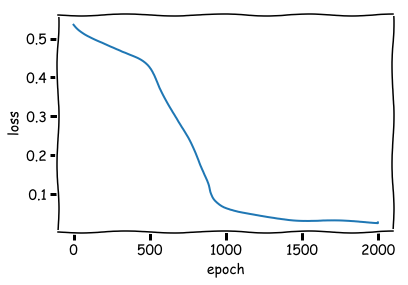

In [36]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

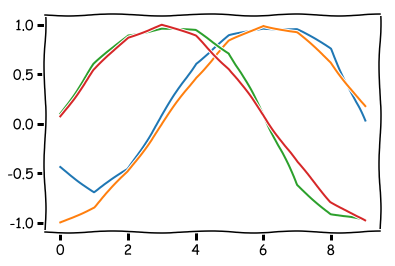

In [42]:
X_test, _ = gen(1)
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(range(10), decoded_imgs[0, :, i])
    plt.plot(range(10), X_test[0, :, i])

plt.show()

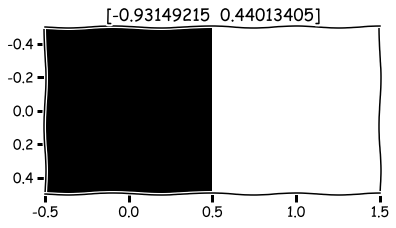

In [43]:
encoder = Model(m.layers[0].input, m.layers[0].output)
encoded_imgs = encoder.predict(X_test)
for i in range(len(encoded_imgs)):
    plt.imshow(encoded_imgs[i].reshape((1, 2)))
    plt.gray()
plt.title(encoded_imgs[i])
dos_numeros = encoded_imgs[i]
plt.show()

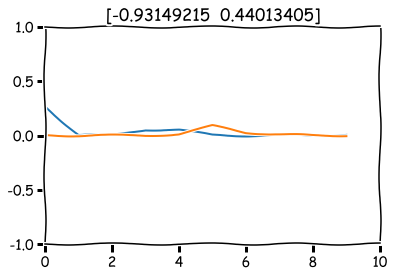

In [44]:
X_test, _ = gen(1)
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(range(10), np.square(np.abs(X_test[0, :, i] - decoded_imgs[0, :, i])), label="MSE")

plt.ylim(-1,1)
plt.xlim(0,10)
plt.title(dos_numeros)
plt.show()

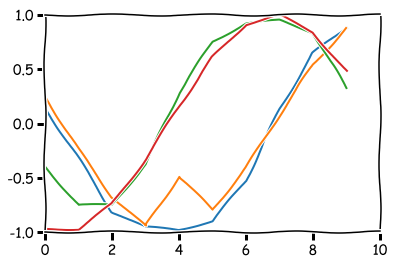

In [47]:
# Now let’s change one data point in the generator. This signifies a regime shift.

X_test, _ = gen(1)
X_test[0, 4, 0] = X_test[0, 4, 0] + 0.5
decoded_imgs = m.predict(X_test)

for i in range(2):
    plt.plot(decoded_imgs[0, :, i])
    plt.plot(X_test[0, :, i])

plt.ylim(-1,1)
plt.xlim(0,10)
plt.show()

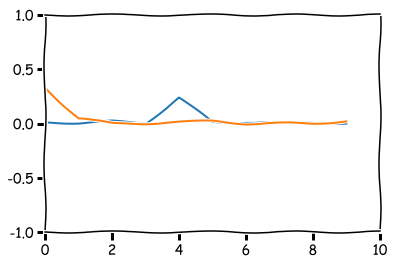

In [48]:
for i in range(2):
    mse = np.square(np.abs(X_test[0, :, i] - decoded_imgs[0, :, i]))
    anomaly = np.argmax(mse)
    if mse[anomaly] > 0.4:
        plt.title("Anomaly detected in series {} at time step: {}".format(i, anomaly))
    plt.plot(range(10), mse, label="MSE")

plt.ylim(-1,1)
plt.xlim(0,10)
plt.show()